# TP2 - Exercise 2 : Analysis of the behaviour of a telecom operator's customers

The file `telecom_client.csv` contains many information about the customers of a telecom operator. Let's see if we can analyze this file to help the company to increase its profits.

## Getting started with the dataset

In [1]:
# Using the pandas library, read the file telecom_client.csv
import matplotlib.pyplot as plt
import pandas as pd

data_clients = pd.read_csv("data/telecom_client.csv")
data_clients.head()

State  Account length  Area code International plan Voice mail plan  \
0    KS             128        415                 No             Yes   
1    OH             107        415                 No             Yes   
2    NJ             137        415                 No              No   
3    OH              84        408                Yes              No   
4    OK              75        415                Yes              No   

   Number vmail messages  Total day minutes  Total day calls  \
0                     25              265.1              110   
1                     26              161.6              123   
2                      0              243.4              114   
3                      0              299.4               71   
4                      0              166.7              113   

   Total day charge  Total eve minutes  Total eve calls  Total eve charge  \
0             45.07              197.4               99             16.78   
1             27.47              195.5              103             16.62   
2             41.38              121.2              110             10.30   
3             50.90               61.9               88              5.26   
4             28.34              148.3              122             12.61   

   Total night minutes  Total night calls  Total night charge  \
0                244.7                 91               11.01   
1                254.4                103               11.45   
2                162.6                104                7.32   
3                196.9                 89                8.86   
4                186.9                121                8.41   

   Total intl minutes  Total intl calls  Total intl charge  \
0                10.0                 3               2.70   
1                13.7                 3               3.70   
2                12.2                 5               3.29   
3                 6.6                 7               1.78   
4                10.1                 3               2.73   

   Customer service calls  Termination  
0                       1        False  
1                       1        False  
2                       0        False  
3                       2        False  
4                       3        False

In [4]:
# How many information (i.e. columns) are in this dataset?
# Don't count them manually! Use a piece of code to do it.
len(data_clients.columns)

20

In [5]:
# How many clients does this dataset have?
len(data_clients.index)

3333

In [6]:
# Print the first 15 items of this dataset
data_clients.head(15)

State  Account length  Area code International plan Voice mail plan  \
0     KS             128        415                 No             Yes   
1     OH             107        415                 No             Yes   
2     NJ             137        415                 No              No   
3     OH              84        408                Yes              No   
4     OK              75        415                Yes              No   
5     AL             118        510                Yes              No   
6     MA             121        510                 No             Yes   
7     MO             147        415                Yes              No   
8     LA             117        408                 No              No   
9     WV             141        415                Yes             Yes   
10    IN              65        415                 No              No   
11    RI              74        415                 No              No   
12    IA             168        408                 No              No   
13    MT              95        510                 No              No   
14    IA              62        415                 No              No   

    Number vmail messages  Total day minutes  Total day calls  \
0                      25              265.1              110   
1                      26              161.6              123   
2                       0              243.4              114   
3                       0              299.4               71   
4                       0              166.7              113   
5                       0              223.4               98   
6                      24              218.2               88   
7                       0              157.0               79   
8                       0              184.5               97   
9                      37              258.6               84   
10                      0              129.1              137   
11                      0              187.7              127   
12                      0              128.8               96   
13                      0              156.6               88   
14                      0              120.7               70   

    Total day charge  Total eve minutes  Total eve calls  Total eve charge  \
0              45.07              197.4               99             16.78   
1              27.47              195.5              103             16.62   
2              41.38              121.2              110             10.30   
3              50.90               61.9               88              5.26   
4              28.34              148.3              122             12.61   
5              37.98              220.6              101             18.75   
6              37.09              348.5              108             29.62   
7              26.69              103.1               94              8.76   
8              31.37              351.6               80             29.89   
9              43.96              222.0              111             18.87   
10             21.95              228.5               83             19.42   
11             31.91              163.4              148             13.89   
12             21.90              104.9               71              8.92   
13             26.62              247.6               75             21.05   
14             20.52              307.2               76             26.11   

    Total night minutes  Total night calls  Total night charge  \
0                 244.7                 91               11.01   
1                 254.4                103               11.45   
2                 162.6                104                7.32   
3                 196.9                 89                8.86   
4                 186.9                121                8.41   
5                 203.9                118                9.18   
6                 212.6                118                9.57   


In [11]:
# What is the type of the data in the "Total day minutes"
# column?
data_clients["Total day minutes"].dtype

dtype('float64')

In [15]:
# Print the list of the names of the columns.
data_clients.columns

Index(['State', 'Account length', 'Area code', 'International plan',
       'Voice mail plan', 'Number vmail messages', 'Total day minutes',
       'Total day calls', 'Total day charge', 'Total eve minutes',
       'Total eve calls', 'Total eve charge', 'Total night minutes',
       'Total night calls', 'Total night charge', 'Total intl minutes',
       'Total intl calls', 'Total intl charge', 'Customer service calls',
       'Termination'],
      dtype='object')

In [16]:
# What are the 10 most frequent states?
data_clients["State"].value_counts().head(10)

WV    106
MN     84
NY     83
AL     80
OH     78
OR     78
WI     78
VA     77
WY     77
CT     74
Name: State, dtype: int64

In [23]:
# What is the average "Account length" for Ohio (OH)? 
# for New Jersey (NJ)?
data_clients[data_clients["State"] == "OH"]["Account length"].mean()
#data_clients[data_clients["State"] == "NJ"]["Account length"].mean()

102.15384615384616

In [21]:
# What is the maximum "Total night calls"?
data_clients["Total night calls"].max()

175

In [24]:
# What is the state with the maximum "Total night calls"?
data_clients.groupby("State").mean()["Total night calls"].head(1)

State
AK    97.346154
Name: Total night calls, dtype: float64

## Finding a problem

In [28]:
# The dataset contains a column "Termination" which
# indicates if the client has terminated its contract with 
# the operator. Find the number of people who terminated
# their contract.
sum(data_clients["Termination"]==True)

483

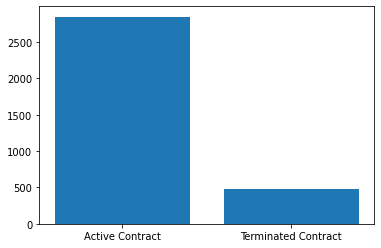

In [29]:
# Represent the number of person who terminated their
# contract and those who didn't with a vertical bar chart.
x = ["Active Contract", "Terminated Contract"]
y = [sum(data_clients["Termination"]==False),sum(data_clients["Termination"]==True)]
plt.bar(x,y)
plt.show()

In [32]:
# Find the ratio of people who terminated their contract
# among all users.

# Percentage
sum(data_clients["Termination"]==True) / len(data_clients.index)

0.14491449144914492

In [ ]:
# What is you opinion about this ratio ?

# I think this ratio is pretty high, which means that 
# customers are not satisfied with the product

## Identifying similar patterns

To increase its profits, the company should keep its customers and prevent them to terminate their contract. There may be a common reason why customers terminate.

In [36]:
# Find the mean of all fields for users who terminated
# their contracts.
data_clients[data_clients["Termination"]==True].mean()

Account length            102.664596
Area code                 437.817805
Number vmail messages       5.115942
Total day minutes         206.914079
Total day calls           101.335404
Total day charge           35.175921
Total eve minutes         212.410145
Total eve calls           100.561077
Total eve charge           18.054969
Total night minutes       205.231677
Total night calls         100.399586
Total night charge          9.235528
Total intl minutes         10.700000
Total intl calls            4.163561
Total intl charge           2.889545
Customer service calls      2.229814
Termination                 1.000000
dtype: float64

In [37]:
# Find the mean of all fields for users who didn't
# terminated their contracts. Compare it to the mean of
# the previous question. Do you see large differences?
data_clients[data_clients["Termination"]==False].mean()

Account length            100.793684
Area code                 437.074737
Number vmail messages       8.604561
Total day minutes         175.175754
Total day calls           100.283158
Total day charge           29.780421
Total eve minutes         199.043298
Total eve calls           100.038596
Total eve charge           16.918909
Total night minutes       200.133193
Total night calls         100.058246
Total night charge          9.006074
Total intl minutes         10.158877
Total intl calls            4.532982
Total intl charge           2.743404
Customer service calls      1.449825
Termination                 0.000000
dtype: float64

In [ ]:
# Find the following information:
#  - number of users with a contract AND (NO International plan AND NO Voice mail plan)
#  - number of users with a contract AND (International plan OR Voice mail plan)
#  - number of users with a contract AND (International plan AND Voice mail plan)
#  - the same 3 information for users who terminated their contract

len()

In [ ]:
# Print the 6 previous information in a vertical bar graph
# Add a legend to differenciate the different categories.

In [ ]:
# Add a new column "Total charge" that is the sum of 4
# other columns:
#   - "Total day charge"
#   - "Total eve charge"
#   - "Total night charge"
#   - "Total intl charge"

In [ ]:
# Find the mean of "Total charge" for users with a contract
# and those who terminated. Do you have any opinion on this 
# result?

In [ ]:
# Find the people with at least 4 calls to customer 
# service. What is the ratio of users who terminated among
# these users?